In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_csv('adult.csv', na_values='?')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Смотрим пустые ячейки workclass
print(data[data['workclass'].isna()].head())
print('--------------------------------------')
# Смотрим пустые ячейки occupation
print(data[data['occupation'].isna()].head())
print('--------------------------------------')
# Смотрим пустые ячейки 
print(data[data['native-country'].isna()].head())

    age workclass  fnlwgt     education  educational-num      marital-status  \
4    18       NaN  103497  Some-college               10       Never-married   
6    29       NaN  227026       HS-grad                9       Never-married   
13   58       NaN  299831       HS-grad                9  Married-civ-spouse   
22   72       NaN  132015       7th-8th                4            Divorced   
35   65       NaN  191846       HS-grad                9  Married-civ-spouse   

   occupation   relationship   race  gender  capital-gain  capital-loss  \
4         NaN      Own-child  White  Female             0             0   
6         NaN      Unmarried  Black    Male             0             0   
13        NaN        Husband  White    Male             0             0   
22        NaN  Not-in-family  White  Female             0             0   
35        NaN        Husband  White    Male             0             0   

    hours-per-week native-country income  
4               30  Unite

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Страна')

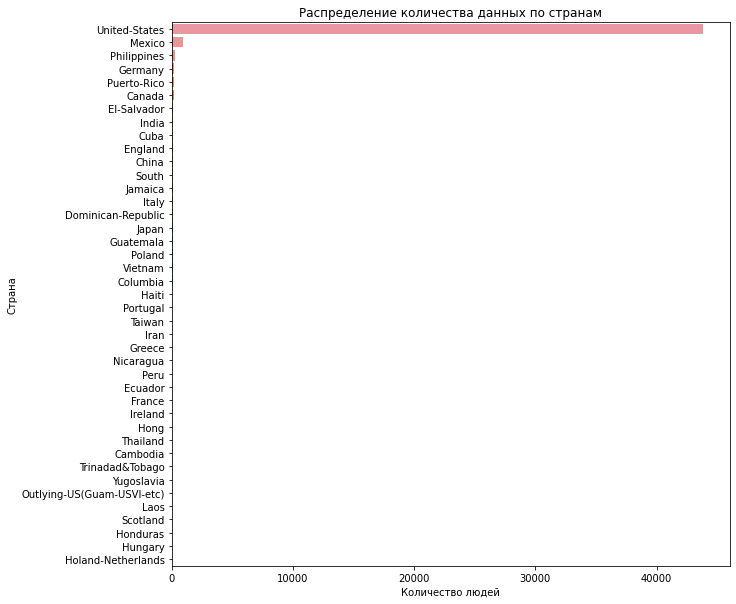

In [ ]:
countries = data['native-country'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(countries.values, countries.index).set_title('Распределение количества данных по странам')
plt.xlabel('Количество людей')
plt.ylabel('Страна')

Видим, что количество людей из США сильно большей чем всех остальных.

Соответственно, мы можем предположить, что пропуски в странах можно заменить на США

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Сфера занятосни')

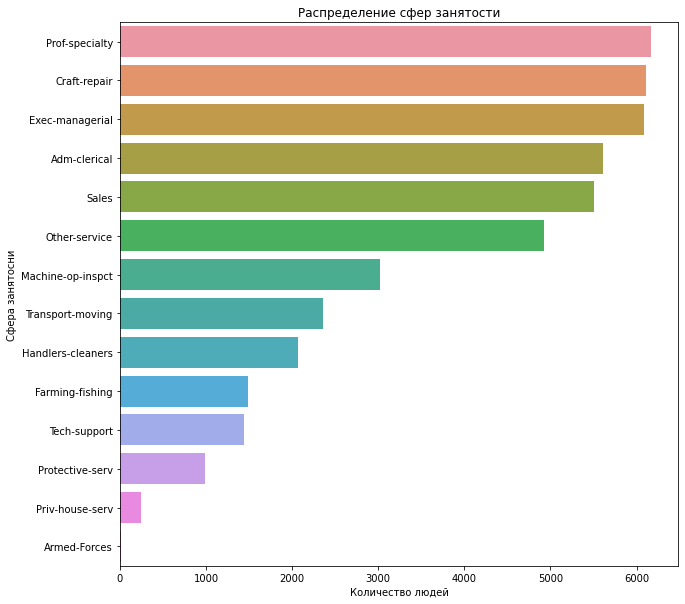

In [ ]:
countries = data['occupation'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(countries.values, countries.index).set_title('Распределение сфер занятости')
plt.xlabel('Количество людей')
plt.ylabel('Сфера занятосни')

Тут видно, что распредение по сферам занятости ненастолько однозначно как у стран. Соответственно мы попробуем сделать заполнение пропусков по различным модальным значениям в различных группах, например по возрасту и уровню образования.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Распределение возрастов в зависимости от пола')

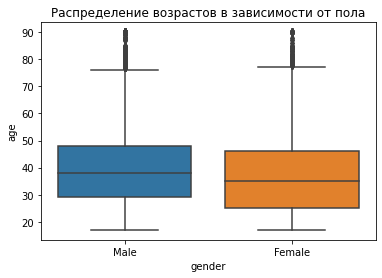

In [ ]:
sns.boxplot(data['gender'], data['age']).set_title('Распределение возрастов в зависимости от пола')

Преобразуем данные

In [ ]:
# Удаляем строки с пропусками в данных и проверяем результат

In [ ]:
data = data[~data['workclass'].isna()]
data.info()
# Остаются пропуски в странах, для первичного обучения удалим и их так же

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46043 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           46043 non-null  int64 
 3   education        46043 non-null  object
 4   educational-num  46043 non-null  int64 
 5   marital-status   46043 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     46043 non-null  object
 8   race             46043 non-null  object
 9   gender           46043 non-null  object
 10  capital-gain     46043 non-null  int64 
 11  capital-loss     46043 non-null  int64 
 12  hours-per-week   46043 non-null  int64 
 13  native-country   45232 non-null  object
 14  income           46043 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data = data[~data['native-country'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45232 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45232 non-null  int64 
 1   workclass        45232 non-null  object
 2   fnlwgt           45232 non-null  int64 
 3   education        45232 non-null  object
 4   educational-num  45232 non-null  int64 
 5   marital-status   45232 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45232 non-null  object
 8   race             45232 non-null  object
 9   gender           45232 non-null  object
 10  capital-gain     45232 non-null  int64 
 11  capital-loss     45232 non-null  int64 
 12  hours-per-week   45232 non-null  int64 
 13  native-country   45232 non-null  object
 14  income           45232 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
features = data[['age', 'workclass', 'fnlwgt', 'educational-num', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
features.head()

,age,workclass,fnlwgt,educational-num,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,9,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,12,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,10,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,6,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [ ]:
target = data['income']
target.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
5    <=50K
Name: income, dtype: object

In [ ]:
X = pd.get_dummies(features, columns=['workclass', 'occupation', 'relationship', 'race', 'native-country'])
X.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,Male,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
le = LabelEncoder()

In [ ]:
X['gender'] = le.fit_transform(X['gender'])
X.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,1,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
target = pd.Series(le.fit_transform(target))
target.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

Стандартизуем данные и сделаем пайплайн обучения логистической регрессии

Считаем метрики

In [ ]:
lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [ ]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [ ]:
lr_y_pred = lr_model.predict(X_test)
lr_y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
lr_model.score(X_train, y_train)

0.8481138593339782

In [ ]:
lr_model.score(X_test, y_test)

0.8512213993589035

In [ ]:
confusion_matrix(y_test, lr_y_pred)

array([[6327,  529],
       [ 817, 1374]])

Видим где ошиблась модель:

Ошибочно негативные предсказания - 817

Ошибочно положительные предсказания - 529

In [ ]:
# Полнота
recall_score(y_test, lr_y_pred)

0.627110908261068

In [ ]:
# Точность
precision_score(y_test, lr_y_pred)

0.7220178665265371

Стандартизуем данные и сделаем пайплайн обучения SVC

Считаем метрики

In [ ]:
svc_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=5)
)

In [ ]:
svc_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=5, kernel='poly'))])

In [ ]:
svc_y_pred = svc_model.predict(X_test)
svc_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svc_model.score(X_train, y_train)

0.8081801851595966

In [ ]:
svc_model.score(X_test, y_test)

0.78976456283851

In [ ]:
confusion_matrix(y_test, svc_y_pred)

array([[6609,  247],
       [1655,  536]])

Далее попробую заменить пропуски и обучиться снова.

In [ ]:
df = pd.read_csv('adult.csv', na_values='?')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [ ]:
# Возьмем модальное значение от группировки по образованию и рассе 
df['occupation'] = df['occupation'].fillna(df.groupby(['education', 'race'])['occupation'].transform(lambda x: x.mode()[0]))

In [ ]:
# Возьмем модальное значение от группировки по образованию и рассе 
df['workclass'] = df['workclass'].fillna(df.groupby(['education', 'race'])['workclass'].transform(lambda x: x.mode()[0]))

In [ ]:
# Получаем полный датафрейм без пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Далее выполним все те же действия по обучению моделей

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
features_n = df[['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
features_n.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,103497,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States


In [ ]:
target_n = df['income']

In [ ]:
X1 = pd.get_dummies(features_n, columns=['workclass', 'occupation', 'marital-status', 'relationship', 'race', 'native-country'])
X1.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X1['gender'] = le.fit_transform(X1['gender'])
X1.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
target_n = pd.Series(le.fit_transform(target_n))

In [ ]:
lr_model_n = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, target_n, test_size=0.2, random_state=42)

In [ ]:
lr_model_n.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [ ]:
lr_y_pred = lr_model_n.predict(X_test)

In [ ]:
lr_model_n.score(X_train, y_train)

0.8521485424717836

In [ ]:
lr_model_n.score(X_test, y_test)

0.8564847988535162

In [ ]:
confusion_matrix(y_test, lr_y_pred)

array([[6967,  512],
       [ 890, 1400]])

Видим, что скор улучшился, но не сильно больше чем на меньшем датафрейме

In [ ]:
svc_model_n = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=5)
)

In [ ]:
svc_model_n.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=5, kernel='poly'))])

In [ ]:
svc_y_pred = svc_model_n.predict(X_test)

In [ ]:
svc_model_n.score(X_train, y_train)

0.814680213958488

In [ ]:
confusion_matrix(y_test, svc_y_pred)

array([[7229,  250],
       [1719,  571]])

Видимо, что скор у SVC так же увеличился, причем значительнее